#### Importation des librairies

In [2]:
import pandas as pd
import numpy as np
import requests
import json

### Chargement des données

In [3]:
loan_df = pd.read_csv("../data/Loan_Data.csv")
print("Aperçu du dataset :")
display(loan_df.head())


Aperçu du dataset :


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
print(loan_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [5]:
print("Shape : ",loan_df.shape)

Shape :  (614, 13)


In [6]:
#Description statistique des variables numériques
loan_df.describe().T.round(2) #Arronfir à 2 décimales après la virgule

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.46,6109.04,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.25,2926.25,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.41,85.59,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.00,65.12,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.84,0.36,0.0,1.0,1.0,1.00,1.0


In [7]:
#Description statistique des variables catégorielles
loan_df.describe(include=object)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


## Analyse exploratoire des données (EDA)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing


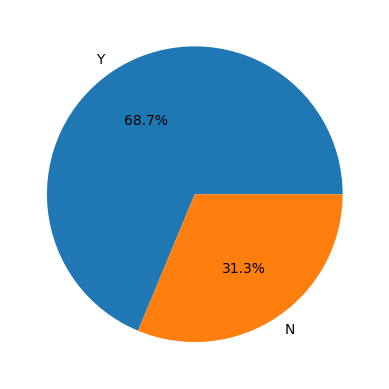

In [9]:
temp = loan_df['Loan_Status'].value_counts()
plt.pie(temp.values,
        labels=temp.index,
        autopct='%1.1f%%')
plt.show()

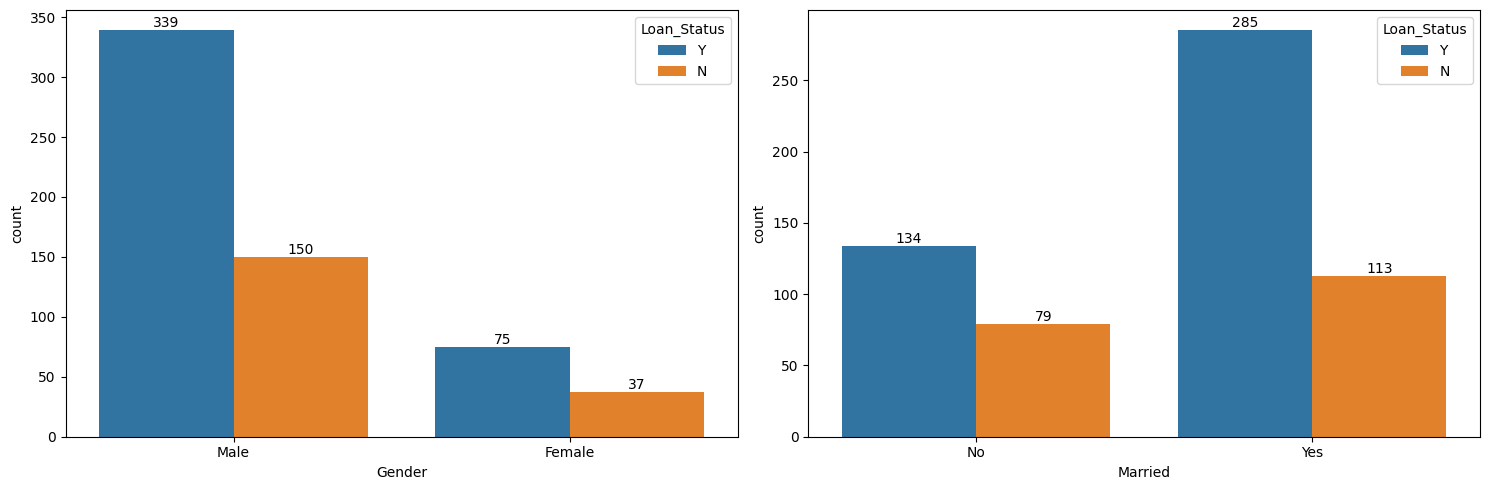

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for i, col in enumerate(['Gender', 'Married']):
    ax = axes[i]
    sns.countplot(data=loan_df, x=col, hue='Loan_Status', ax=ax)

    # Ajout des labels sur CHAQUE sous-groupe
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge')

plt.tight_layout()
plt.show()


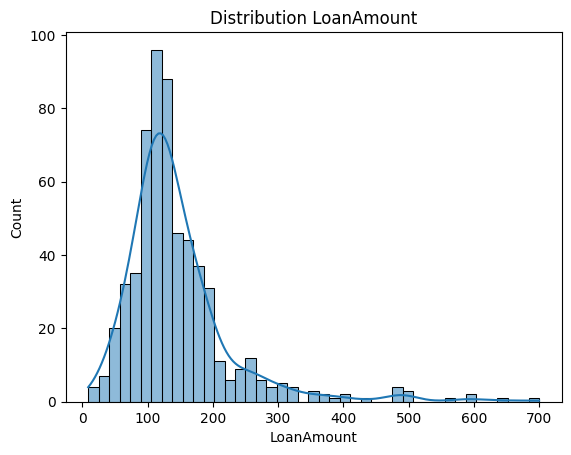

In [11]:

# Distribution LoanAmount
sns.histplot(loan_df["LoanAmount"].dropna(), kde=True)
plt.title("Distribution LoanAmount")
plt.show()


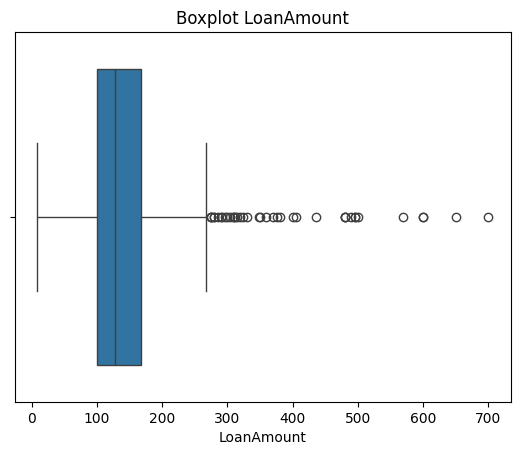

In [12]:

# Boxplot pour détecter outliers
sns.boxplot(x=loan_df["LoanAmount"])
plt.title("Boxplot LoanAmount")
plt.show()



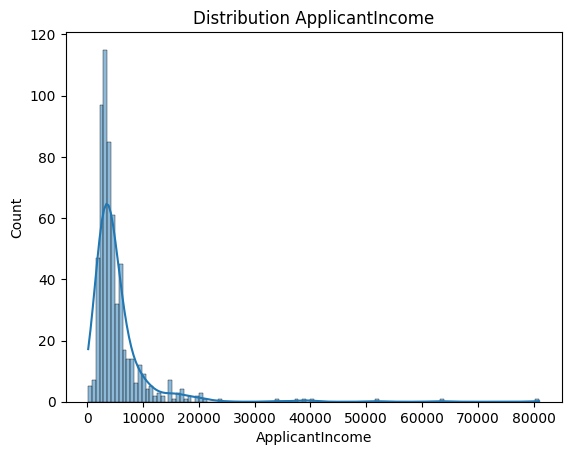

In [13]:
# Histogramme ApplicantIncome
sns.histplot(loan_df["ApplicantIncome"], kde=True)
plt.title("Distribution ApplicantIncome")
plt.show()


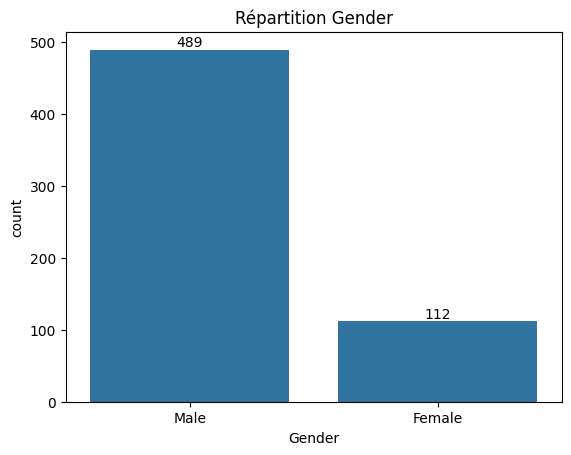

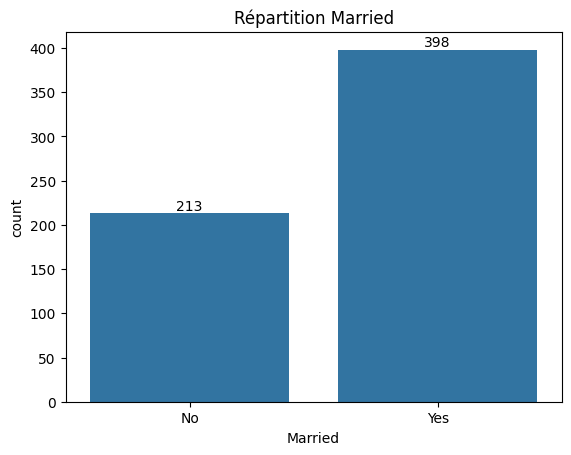

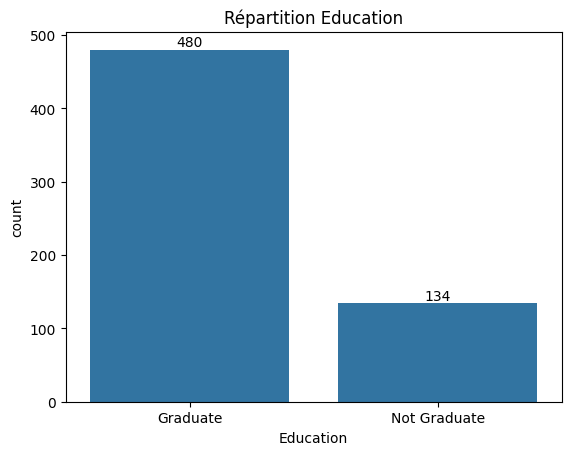

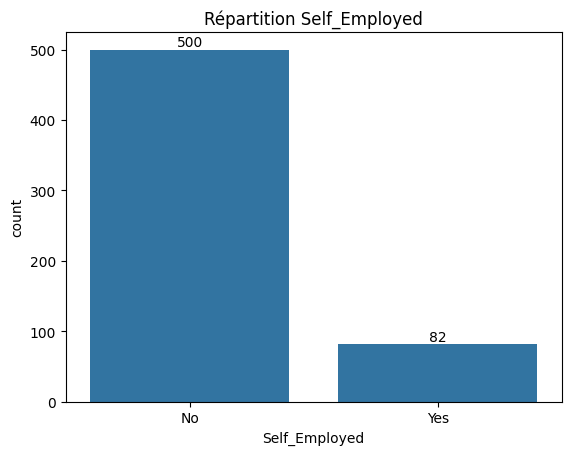

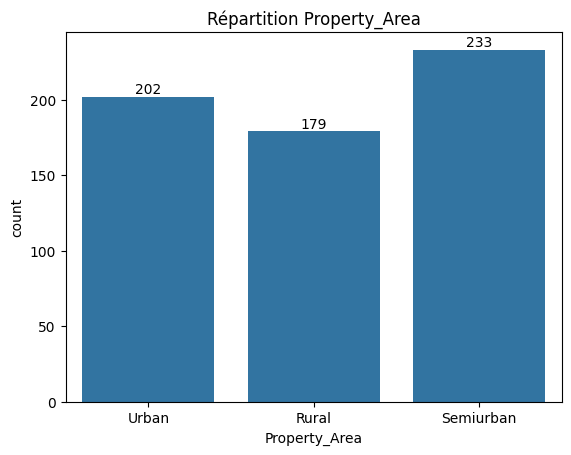

In [14]:

for col in ["Gender", "Married", "Education", "Self_Employed", "Property_Area"]:
    ax = sns.countplot(x=col, data=loan_df)
    plt.title(f"Répartition {col}")
    
    # Ajouter les valeurs
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge')
    
    plt.show()

Credit_History
1.0    475
0.0     89
NaN     50
Name: count, dtype: int64


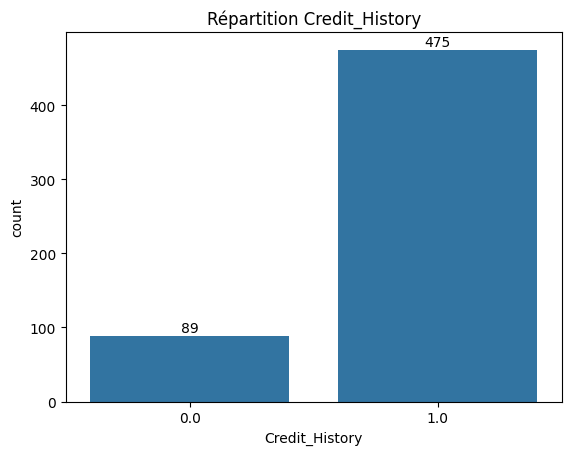

In [15]:

Credit_HistoryAnalysis = loan_df.Credit_History.value_counts(dropna=False)
print(Credit_HistoryAnalysis)

ax = sns.countplot(x="Credit_History", data=loan_df)
plt.title("Répartition Credit_History")

# Ajouter les valeurs
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.show()



<Axes: >

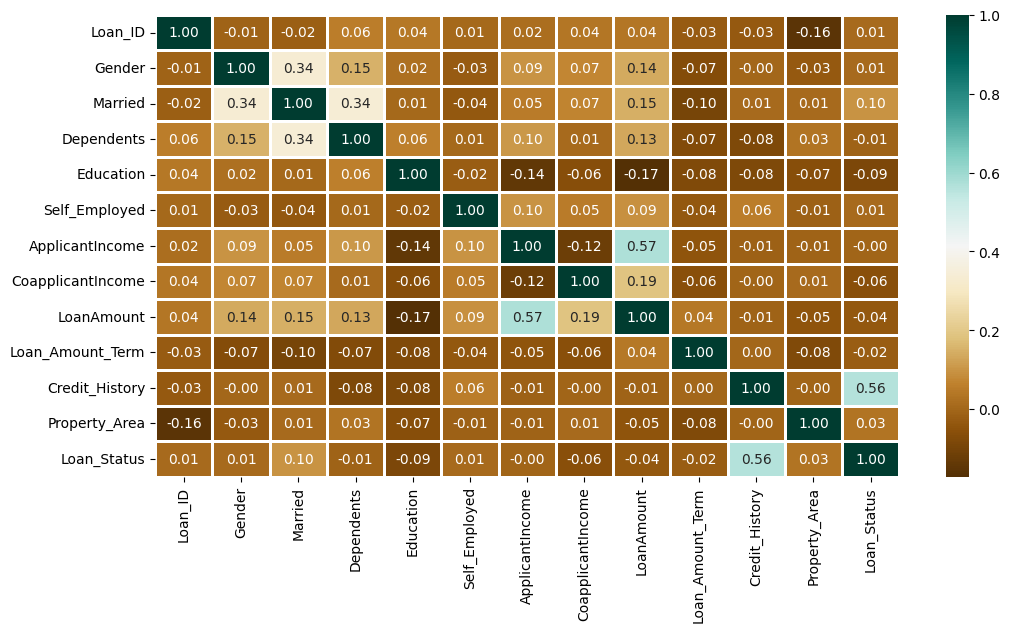

In [16]:
label_encoder = preprocessing.LabelEncoder()
obj = (loan_df.dtypes == 'object')
for col in list(obj[obj].index):
  loan_df[col] = label_encoder.fit_transform(loan_df[col])

plt.figure(figsize=(12,6))

sns.heatmap(loan_df.corr(),cmap='BrBG',fmt='.2f',
            linewidths=2,annot=True)

### Prétraitement 

In [17]:
from sklearn.impute import SimpleImputer
import numpy as np

In [18]:
# Le montant du prêt est en milliers mais dans la réalite on le vois en centaines, on va donc convertir le montant en millier 
loan_df["LoanAmount"] = loan_df["LoanAmount"] * 1000

In [19]:
#Supression de la colonne Loan_ID car inutile 
loan_df.drop(columns=["Loan_ID"], inplace=True)

In [20]:
#GEstion des valeurs manquantes numériques pour LoanAmount, Loan_Amount_Term et Credit_History
loan_df["LoanAmount"].fillna(loan_df["LoanAmount"].median()) #On utilise la médiane car  la moyenne est influencée par les outliers
loan_df["Loan_Amount_Term"].fillna(loan_df["Loan_Amount_Term"].mode()[0]) #On utilise le mode car c'est une variable catégorielle et on a des valeurs discrère
loan_df["Credit_History"].fillna(loan_df["Credit_History"].mode()[0]) #On utilise le mode car c'est une variable catégorielle et on a peu de valeur unique 

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64

In [21]:
#GEston des valeurs manquantes catégorielles 
for col in ["Gender", "Married", "Dependents", "Self_Employed"]:
    loan_df[col].fillna(loan_df[col].mode()[0]) 

In [22]:
#Vérification des outliers : On applique une transformation logarithmique pour réduire l'impact des outliers

loan_df["ApplicantIncome_log"] = np.log1p(loan_df["ApplicantIncome"])
loan_df["LoanAmount_log"] = np.log1p(loan_df["LoanAmount"])

### Generation de la colonne Year

In [23]:
# Fixer la graine pour reproductibilité
np.random.seed(42)

# Générer une colonne Year entre 2015 et 2023
loan_df["Year"] = np.random.randint(2016, 2025, size=len(loan_df))


### Récupération de l'API

In [24]:

import requests
import pandas as pd
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv

load_dotenv()
API_KEY = os.getenv("WEBSTAT_API_KEY")

# URL de base pour l'API Webstat
BASE_URL = "https://webstat.banque-france.fr/api/explore/v2.1/catalog/datasets/observations/exports/json"

# Configuration de la session avec proxy et authentification API
session = requests.Session()

# Configuration des en-têtes avec l'API key (remplacez par votre propre clé API)
headers = {
    'Authorization': f"Apikey {API_KEY}",  
    'accept': "application/json"
}

# Fonction pour interroger l'API Webstat et récupérer une série avec la clause WHERE
def get_series(series_key):
    params = {
        "select": "time_period_start, obs_value",  # Colonnes à récupérer
        "where": f"series_key='{series_key}'"   # Filtrer par la série spécifiée avec la clause WHERE
    }
    
    # Requête via session avec en-têtes et proxy
    response = session.get(BASE_URL, headers=headers, params=params)
    
    if response.status_code == 200:
        data = response.json()
        # Conversion en DataFrame pandas
        df = pd.DataFrame(data)
        # Convertir les dates en format datetime pour faciliter la manipulation
        df['time_period_start'] = pd.to_datetime(df['time_period_start'])
        return df
    else:
        print(f"Erreur lors de la requête : {response.status_code}")
        return None

df = get_series("MIR1.Q.FR.R.A22FRF.R.R.A.2254FR.EUR.N")

if df is not None:
    print(df.head())

  time_period_start  obs_value
0        2024-10-01       4.35
1        2024-01-01       4.60
2        2023-10-01       4.51
3        2022-04-01       1.95
4        2022-01-01       1.82


In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   time_period_start  35 non-null     datetime64[ns]
 1   obs_value          32 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 692.0 bytes
None


#### Prétraitement des données API (valeurs aberrantes, nulles, mauvaises saisies)

In [26]:
#Remplacer les valeurs nulles par la moyenne de l'année correspondante
df['obs_value'] = df.groupby(df['time_period_start'].dt.year)['obs_value'].transform(
    lambda x: x.fillna(x.mean())
)
#Vérifier le nombre de valeurs nulles restantes
print(df['obs_value'].isna().sum())


0


In [27]:
if df is not None:
    df['year'] = df['time_period_start'].dt.year #Rajouter une colonne année
    df_yearly = df.groupby('year', as_index=False)['obs_value'].mean() # Crée une nvl table avec la moyenne annuelle

    print("Données de la table df:")
    print(df.head())
    print("Nouvelle table df_yearly :")
    print(df_yearly)

Données de la table df:
  time_period_start  obs_value  year
0        2024-10-01       4.35  2024
1        2024-01-01       4.60  2024
2        2023-10-01       4.51  2023
3        2022-04-01       1.95  2022
4        2022-01-01       1.82  2022
Nouvelle table df_yearly :
   year  obs_value
0  2016     2.5100
1  2017     2.3275
2  2018     2.1850
3  2019     2.0125
4  2020     1.8550
5  2021     1.8275
6  2022     2.1725
7  2023     4.5100
8  2024     4.5175
9  2025     3.9300


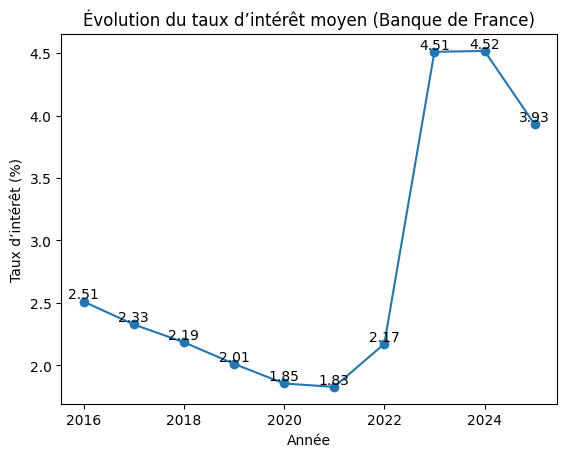

In [28]:
plt.plot(df_yearly["year"], df_yearly["obs_value"], marker="o")
for x, y in zip(df_yearly["year"], df_yearly["obs_value"]):
    plt.text(x, y, f"{y:.2f}", ha='center', va='bottom')
plt.title("Évolution du taux d’intérêt moyen (Banque de France)")
plt.xlabel("Année")
plt.ylabel("Taux d’intérêt (%)")
plt.show()

### Intégration des données - Merge

Fusion de la colonne InterestRate de df_yearly sur la table loan_df avec Year en colonne commune

In [29]:
loan_df = loan_df.merge(df_yearly, left_on="Year", right_on="year", how="left")
loan_df.rename(columns={"obs_value": "InterestRate"}, inplace=True)
loan_df.drop(columns=["year"], inplace=True)

In [30]:
print(loan_df[['Year', 'InterestRate']].head(10))

   Year  InterestRate
0  2022        2.1725
1  2019        2.0125
2  2023        4.5100
3  2020        1.8550
4  2022        2.1725
5  2018        2.1850
6  2022        2.1725
7  2023        4.5100
8  2020        1.8550
9  2019        2.0125


In [31]:
#Exporter le dataset propre
loan_df.to_csv("../data/Loan_clean.csv", index=False)
